In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
n_epochs=3
batch_size_train=64
batch_size_test=1000
learning_rate=0.01
momentum=0.5
log_interval=10
random_seed=1
torch.manual_seed(random_seed)

In [3]:
train_dataset=torchvision.datasets.MNIST("../num/",True,torchvision.transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST("../num/",False,torchvision.transforms.ToTensor(),download=True)

In [4]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size_train,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size_test,shuffle=True)
len(train_loader),len(test_loader)

(938, 10)

In [5]:
# examples=enumerate(test_loader)
# batch_idx,(example_data,example_targets)=next(examples)
# print(batch_idx)
# print(example_targets)
# print(example_data.shape)
examples=enumerate(train_loader)
batch_idx,(example_data,example_targets)=next(examples)
print(example_targets)
print(example_data.shape)

tensor([4, 8, 8, 6, 7, 1, 0, 7, 1, 8, 7, 6, 4, 9, 1, 5, 3, 2, 6, 8, 8, 6, 9, 4,
        6, 0, 4, 2, 6, 7, 0, 5, 8, 6, 0, 3, 5, 7, 4, 7, 5, 1, 6, 7, 3, 6, 0, 3,
        1, 1, 2, 6, 7, 9, 8, 0, 7, 2, 4, 3, 6, 5, 9, 5])
torch.Size([64, 1, 28, 28])


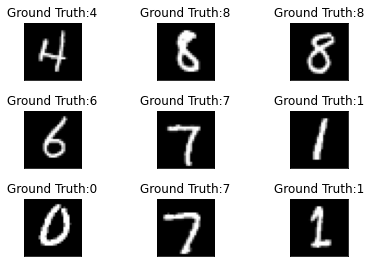

In [6]:
fig=plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0],cmap='gray')
    plt.title("Ground Truth:{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)
        return F.log_softmax(x)

In [9]:
network=Net()
optimizer=optim.SGD(network.parameters(),lr=learning_rate,momentum=momentum)

In [10]:
train_losses=[]
train_counter=[]
test_losses=[]
test_counter=[i*len(train_loader.dataset) for i in range (n_epochs+1)]

In [11]:
def train(epoch):
    network.train()
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=network(data)
        loss=F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval ==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tloss: {:.6f}'.format(epoch,batch_idx*len(data),len(train_dataset),100.*batch_idx/len(train_loader),loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64)+((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(),'../model.pth')
            torch.save(optimizer.state_dict(),'../optimizer.pth')
#train(1)

In [12]:
def test():
    network.eval()
    test_loss=0.0
    correct=0
    with torch.no_grad():
        for data,target in test_loader:
            output=network(data)
            test_loss+=F.nll_loss(output,target,size_average=False).item()
            pred=output.data.max(1,keepdim=True)[1]
            correct+=pred.eq(target.data.view_as(pred)).sum()
    test_loss/=len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set:Avg-Loss: {:.4f},Accuracy: {}/{}({:.0f}%)\n'.format(test_loss,correct,len(test_loader.dataset),100.*correct/len(test_loader.dataset)))

#test()

In [13]:
test()
for epoch in range(1,n_epochs+1):
    train(epoch)
    test()


C:\Users\17358\AppData\Local\Temp/ipykernel_3084/2760704493.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
D:\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set:Avg-Loss: 2.3061,Accuracy: 926/10000(9%)

Train Epoch: 1 [0/60000 (0%)]	loss: 2.312350
Train Epoch: 1 [640/60000 (1%)]	loss: 2.304808
Train Epoch: 1 [1280/60000 (2%)]	loss: 2.309731
Train Epoch: 1 [1920/60000 (3%)]	loss: 2.302175
Train Epoch: 1 [2560/60000 (4%)]	loss: 2.286710
Train Epoch: 1 [3200/60000 (5%)]	loss: 2.305280
Train Epoch: 1 [3840/60000 (6%)]	loss: 2.292568
Train Epoch: 1 [4480/60000 (7%)]	loss: 2.286998
Train Epoch: 1 [5120/60000 (9%)]	loss: 2.303581
Train Epoch: 1 [5760/60000 (10%)]	loss: 2.293684
Train Epoch: 1 [6400/60000 (11%)]	loss: 2.274991
Train Epoch: 1 [7040/60000 (12%)]	loss: 2.266299
Train Epoch: 1 [7680/60000 (13%)]	loss: 2.289222
Train Epoch: 1 [8320/60000 (14%)]	loss: 2.284973
Train Epoch: 1 [8960/60000 (15%)]	loss: 2.270064
Train Epoch: 1 [9600/60000 (16%)]	loss: 2.248000
Train Epoch: 1 [10240/60000 (17%)]	loss: 2.244896
Train Epoch: 1 [10880/60000 (18%)]	loss: 2.262900
Train Epoch: 1 [11520/60000 (19%)]	loss: 2.242822
Train Epoch: 1 [12160/60000

Train Epoch: 2 [44160/60000 (74%)]	loss: 0.488213
Train Epoch: 2 [44800/60000 (75%)]	loss: 0.363627
Train Epoch: 2 [45440/60000 (76%)]	loss: 0.633494
Train Epoch: 2 [46080/60000 (77%)]	loss: 0.476490
Train Epoch: 2 [46720/60000 (78%)]	loss: 0.422183
Train Epoch: 2 [47360/60000 (79%)]	loss: 0.319270
Train Epoch: 2 [48000/60000 (80%)]	loss: 0.413971
Train Epoch: 2 [48640/60000 (81%)]	loss: 0.397322
Train Epoch: 2 [49280/60000 (82%)]	loss: 0.439873
Train Epoch: 2 [49920/60000 (83%)]	loss: 0.378627
Train Epoch: 2 [50560/60000 (84%)]	loss: 0.493354
Train Epoch: 2 [51200/60000 (85%)]	loss: 0.585419
Train Epoch: 2 [51840/60000 (86%)]	loss: 0.369550
Train Epoch: 2 [52480/60000 (87%)]	loss: 0.475004
Train Epoch: 2 [53120/60000 (88%)]	loss: 0.457564
Train Epoch: 2 [53760/60000 (90%)]	loss: 0.357817
Train Epoch: 2 [54400/60000 (91%)]	loss: 0.255174
Train Epoch: 2 [55040/60000 (92%)]	loss: 0.647213
Train Epoch: 2 [55680/60000 (93%)]	loss: 0.427000
Train Epoch: 2 [56320/60000 (94%)]	loss: 0.524500


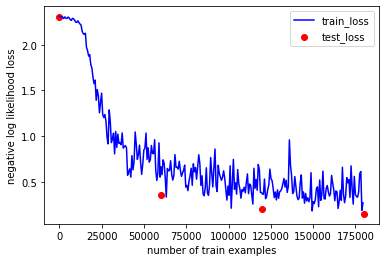

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.plot(train_counter,train_losses,color='blue')
plt.scatter(test_counter,test_losses,color='red')
plt.legend(['train_loss','test_loss'],loc='upper right')
plt.xlabel('number of train examples')
plt.ylabel('negative log likelihood loss')
plt.show()